<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/master/Git_CLI_%EC%86%8C%EC%8A%A4%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GIT_CLI_소스트리

- pull -> add(스테이징) -> commit(지역저장) -> push(원격저장)

# CLI
- 폴더(지역저장소) - 우클릭 - gitbash here

In [ ]:
git pull origin master
git pull origin master --allow-unrelated-histories

In [ ]:
git config --global user.name "mjkimcs"
git config --global user.email "mjkimcs@kaist.ac.kr"
git config --global user.name #확인
git config --global user.email #확인

git init #지역저장소 초기화
git remote add origin https://github.com/mjkimcs/portfolio.git
git remote -v #연결 확인

touch test.txt #파일생성
ls #확인
git add * #변경사항을 스테이징
git status
git commit -m "커밋 메시지"
git log #커밋해시 조회 #q를 누르면 종료
git push origin master #원격저장소에 업로드

In [ ]:
# 원격저장소에 있는 파일 다운로드
git clone https://github.com/mjkimcs/portfolio.git

In [ ]:
# 언스테이지와 커밋취소

# 지역저장소에 test2 파일 생성
git add test2.txt
git status
# test2 파일의 내용 수정 후 git status 확인
git reset #언스테이지
git add .
git commit -m "커밋 메시지"
git log

git reset HEAD~1 #커밋취소
git log

git push origin master

In [ ]:
# git add 시 편리한 .gitignore
# .gitignore 파일 생성 후 ignore.txt 또는 *.jpg

git rm -r --cached .
git add .
git commit -m "커밋 메시지"
git push origin master

In [ ]:
# 브랜치

git branch
git branch test #브랜치 생성
git branch -m test myb #브랜치 이름변경
git branch -d myb #브랜치 삭제
git checkout myb #브랜치 전환
git checkout -b myb3 #브랜치 생성+전환

echo "test" > mytest.txt
cat mytest.txt #내용확인
git add .
git commit -m "커밋 메시지"
git checkout -b myb2

git stash #임시저장(커밋을 안해도 브랜치 간 맘껏 이동가능)
git stash list
git stash apply 0

In [ ]:
# merge

# fast-forward
git checkout master
git merge myb

# non-fast-forward(recursive) : 각기 다른 파일을 가지고 있는 브랜치들을 병합
git checkout myb
git merge myb2
# 파일명이 같은데 다른내용이라서 충돌이 발생한 경우에는 수동으로 내용수정 후
git add .
git commit -m "커밋 메시지"

In [ ]:
# rebase : 이력을 깔끔하게 정리

git checkout master
git rebase myb
git rebase myb2
# 파일명이 같은데 다른내용이라서 충돌이 발생한 경우에는 수동으로 내용수정 후
git add .
git rebase --continue #커밋역할
git rebase --abort #취소

In [ ]:
# 커밋 메시지 수정
git commit --amend
i
메시지 수정 후 Esc
:wq

## 커밋 삭제

In [ ]:
# 준비할 내용

git checkout -b reset

echo "ver1" > reset1.txt
git add .
git commit -m "ver1"

echo "ver2" > reset1.txt
git add .
git commit -m "ver2"

echo "ver3" > reset1.txt
git add .

git log
cat reset1.txt

### reset

In [ ]:
# 스테이지에 내용이 있는 경우

git reset --mixed # 스테이지를 비워줌
git reset --hard # 파일내용까지도 변경 (결과: ver2)

In [ ]:
# 스테이지에 내용이 없는 경우

git checkout -b reset-soft
git reset --soft HEAD~1 # 최신커밋이었던 ver2가 삭제되고 스테이지로 감

git checkout reset
git checkout -b reset-mixed
git reset --mixed HEAD~1 # 스테이지에서도 없어짐

git checkout reset
git stash
git checkout reset
git checkout -b reset-hard
git reset --hard HEAD~1  # 파일내용까지도 변경

### revert : 특정커밋만 삭제 가능

In [ ]:
echo "remove" > remove.txt
git add . 
git commit -m "remove"

echo "ok" > ok.txt
git add . 
git commit -m "ok"

git revert HEAD~1

# 소스트리

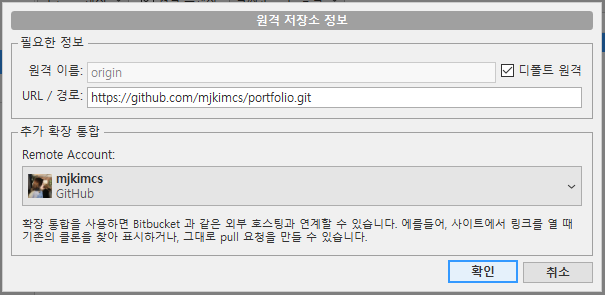

### 병합
- fast-forward : 줄기가 같으면 하나의 선 상에서 병합
- non-fast-forward : 각기 다른 파일을 가지고 있는 브랜치들을 병합, 충돌이 없는 경우 & 충돌이 있는 경우

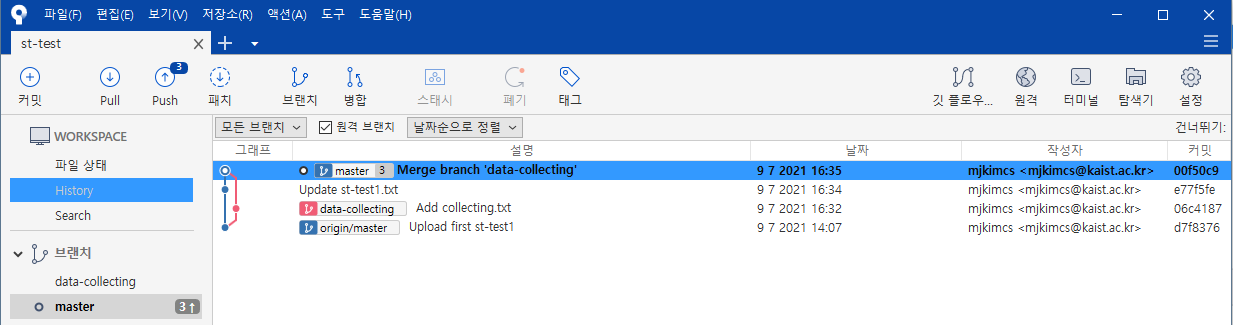

### Stash(스태시) : 임시저장
- 작업 도중 다른 브랜치로 이동할 때
- 불필요하게 커밋하지 말고 스태시 이용!

### Rebase(재배치)
- 서브브랜치를 기준으로 마스터브랜치 히스토리 우클릭 후 재배치
- 커밋 히스토리가 깔끔해짐
- 그러나 푸쉬한 경우 커밋 히스토리가 꼬임
- 따라서, master로 병합 시에는 "병합"을 사용하고, 여러 개발자가 같은 브랜치를 공유할 때는 "재배치"를 사용

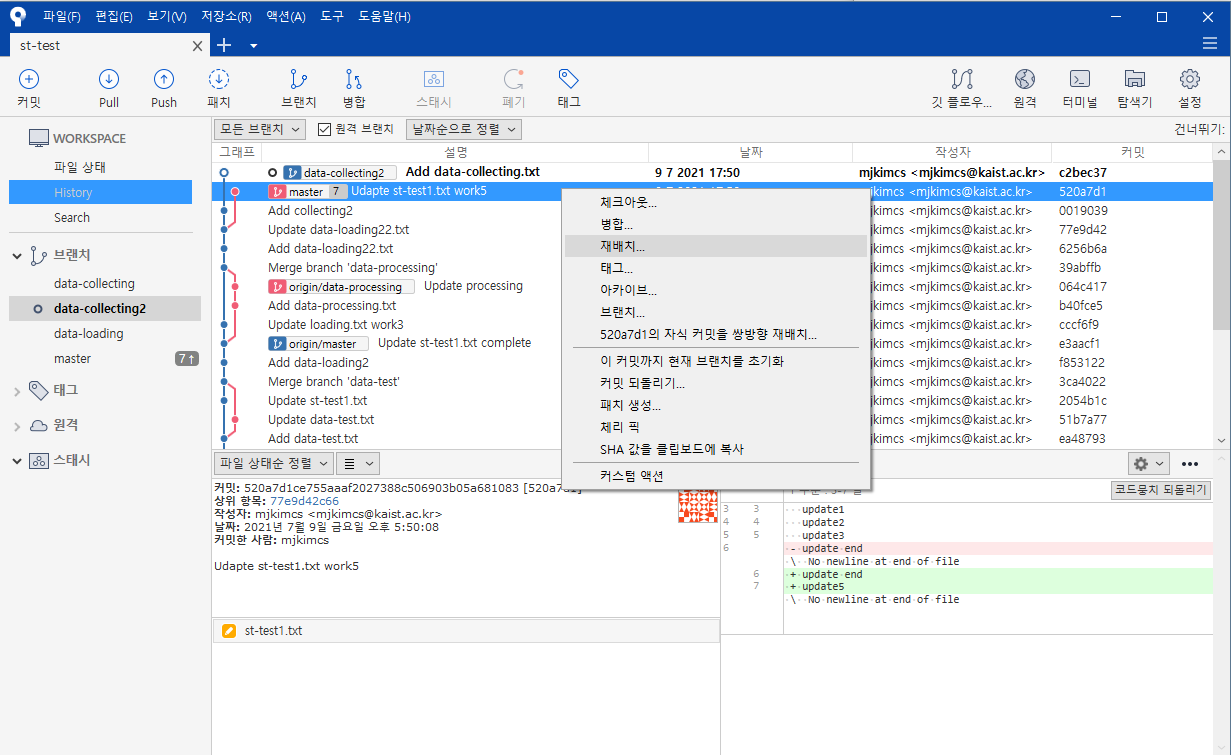

### Reset(초기화)
- 지정커밋 우클릭 후 이 커밋까지 현재 브랜치를 초기화 클릭
- 지정한 커밋 이후의 히스토리를 삭제하고 이동

      1. soft : 히스토리 삭제 + 스테이지에 그대로 있음
      2. mixed : 히스토리 삭제 + 언스테이징 + 내용은 그대로
      3. hard : 히스토리 삭제 + 언스테이징 + 내용도 삭제


### Revert(되돌리기)
- 우클릭 후 커밋 되돌리기 클릭
- 히스토리는 그대로 + 특정커밋만 삭제
- 순차적 되돌리기를 통해 히스토리는 유지한 채 특정커밋으로 이동 가능